# Regime change detection via *Rolling Standard Deviation*

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from darts.datasets import AirPassengersDataset
from darts.dataprocessing.transformers import WindowTransformer

W = 12
OFFSET = pd.DateOffset(years=2)

series = AirPassengersDataset().load()
normal_period, test_period = series.split_after(series.start_time() + OFFSET)

transformer_std = WindowTransformer(
    transforms= {
		"function": "std",
		"mode": "rolling",
        "window": W,
	}
)

series_wndw_std = transformer_std.transform(series)
normal_period_wndw_std = transformer_std.transform(normal_period)

threshold_std = np.nanpercentile(normal_period_wndw_std.values().ravel(), 95)
idx_breach = np.argwhere(series_wndw_std[len(normal_period):].values().ravel() > threshold_std)[0]

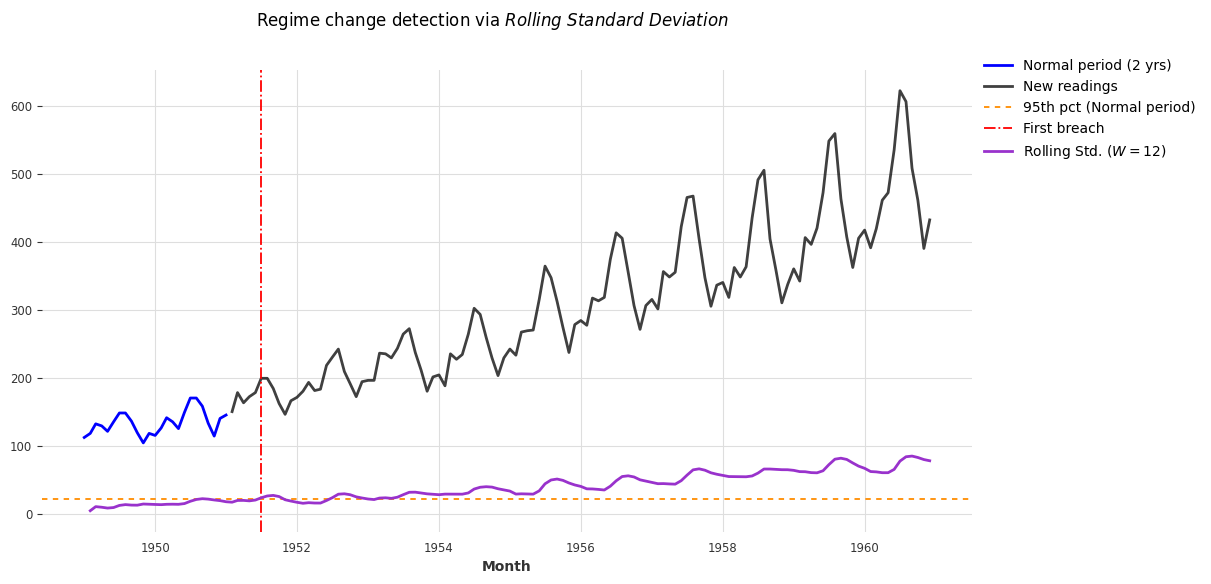

In [43]:
plt.figure(figsize=(12, 6))
plt.suptitle("Regime change detection via $Rolling \ Standard \ Deviation$")

normal_period.plot(label="Normal period (2 yrs)", color="blue")
test_period.plot(label="New readings", color="black", alpha=.75)

plt.gca().axhline(threshold_std, linestyle=(0, (3, 3)), color="darkorange", label="95th pct (Normal period)")
plt.gca().axvline(test_period.time_index[idx_breach], linestyle="dashdot", color="red", label="First breach")

series_wndw_std.plot(label=f"Rolling Std. ($W={W})$", color="darkorchid", linewidth=2)

plt.legend(bbox_to_anchor=(1, 1.05))
plt.show()